In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [91]:
pd.set_option('display.max.rows', None)

In [93]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [95]:
df.shape

(195, 6)

In [97]:
df.isnull().sum()
#df.dropna(subset = ['col.Name'], inplace = True) -- drop null value in a specific column
#df.dropna(inplace = True) -- drop all null values

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [99]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [103]:
#df['Rate'] = df['Rate'].astype(int)
#my_list = ['Rate', 'Count', 'Year']
    #for i in my_list:
        #print(i)
        #df[i] = df[i].astype(int) 

In [105]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [107]:
df['Region'].replace('Americas', 'N/S America', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8036\967097762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].replace('Americas', 'N/S America', inplace = True)


In [109]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1.head()

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22.5,47722,2020
1,Nigeria,Africa,Western Africa,22.0,44200,2019
2,India,Asia,Southern Asia,3.0,40651,2020
3,Mexico,N/S America,Central America,28.4,36579,2020
4,United States,N/S America,Northern America,6.5,21570,2020


In [111]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1['percentage'] = (df1['Count'] *100 / df1['Count'].sum()).round(2)
df1

,Location,Count,percentage
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


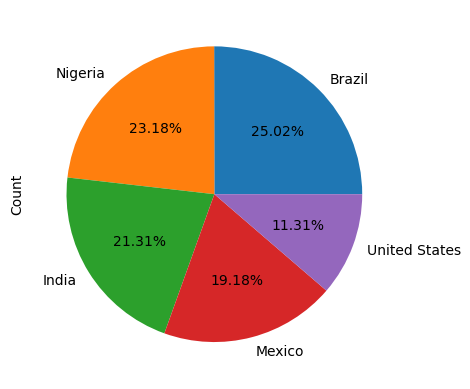

In [113]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [115]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [117]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

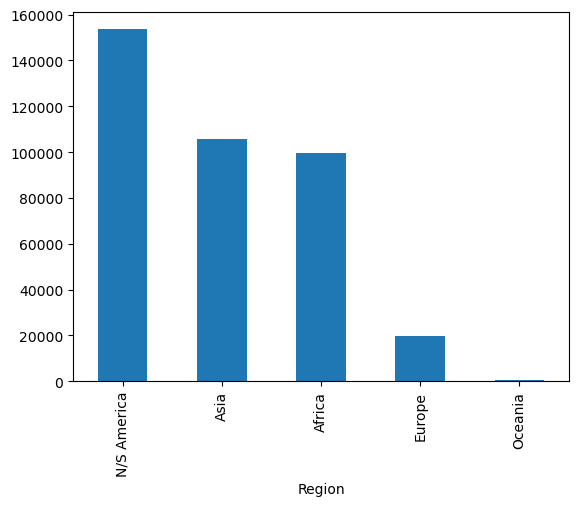

In [119]:
df2.plot(kind = 'bar')
plt.show()

In [121]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [123]:
df3= df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [125]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [127]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

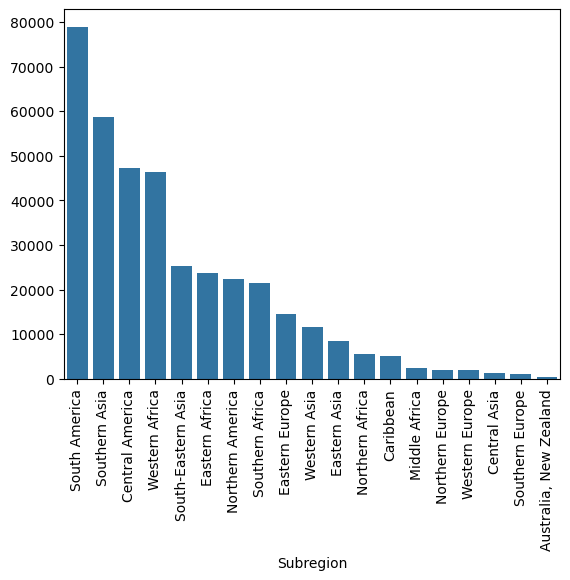

In [129]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabels = None

In [131]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [133]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [135]:
df4 = df[df['Region'].isin(['Asia', 'Europe'])]
df4
#df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
12,Azerbaijan,Asia,Western Asia,2.3,230,2020
14,Bahrain,Asia,Western Asia,0.1,2,2019
15,Bangladesh,Asia,Southern Asia,2.4,3830,2018
17,Belarus,Europe,Eastern Europe,2.4,225,2019
18,Belgium,Europe,Western Europe,1.7,193,2017


In [137]:
df4 = df4[df4['Year'] > 2016][['Region', 'Year', 'Count']]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
12,Asia,2020,230
14,Asia,2019,2
15,Asia,2018,3830
17,Europe,2019,225
18,Europe,2017,193


In [139]:
df4 = df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [141]:
df_unstacked = df4.unstack(level = 0)
df_unstacked 

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [143]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

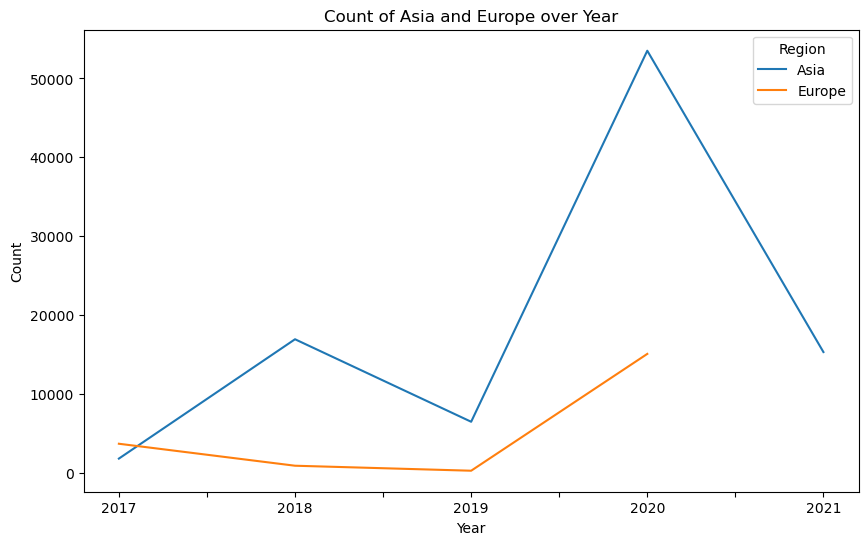

In [145]:
df_unstacked.plot(kind = 'line', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over Year')
plt.show()

In [147]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [153]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False).astype(int)
df5

Year
2020    608
2019    161
2012    119
2016     78
2018     70
2015     58
2014     54
2009     39
2017     30
2021     28
2013     21
2007     19
2010     18
2006     12
2011     10
2008      5
Name: Rate, dtype: int32

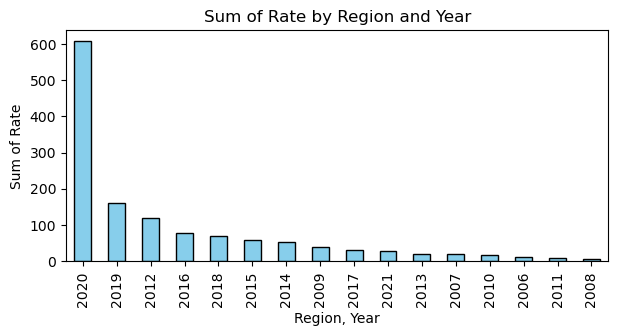

In [165]:
df5.plot(kind = 'bar', figsize = (7,3), color = 'skyblue', edgecolor = 'black')
plt.xlabel('Region, Year')
plt.ylabel('Sum of Rate')
plt.title('Sum of Rate by Region and Year')
plt.show()

In [167]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [169]:
df6 = df[['Year', 'Region','Count']]
df6

,Year,Region,Count
0,2018,Asia,2474
1,2020,Europe,61
2,2020,Africa,580
3,2020,Europe,2
4,2012,Africa,1217
5,2014,N/S America,4
6,2020,N/S America,9
7,2020,N/S America,2416
8,2020,Asia,52
9,2014,N/S America,2


In [173]:
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Asia           6458
     Africa        44210
     Europe          249
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Europe            0
     N/S America     608
     Asia            627
     Africa         4987
2015 Europe            0
     Asia            241
     Africa         2206
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     Asia             61
     N/S America      53
2011 Europe            0
     Asia           1626
     Africa          855
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

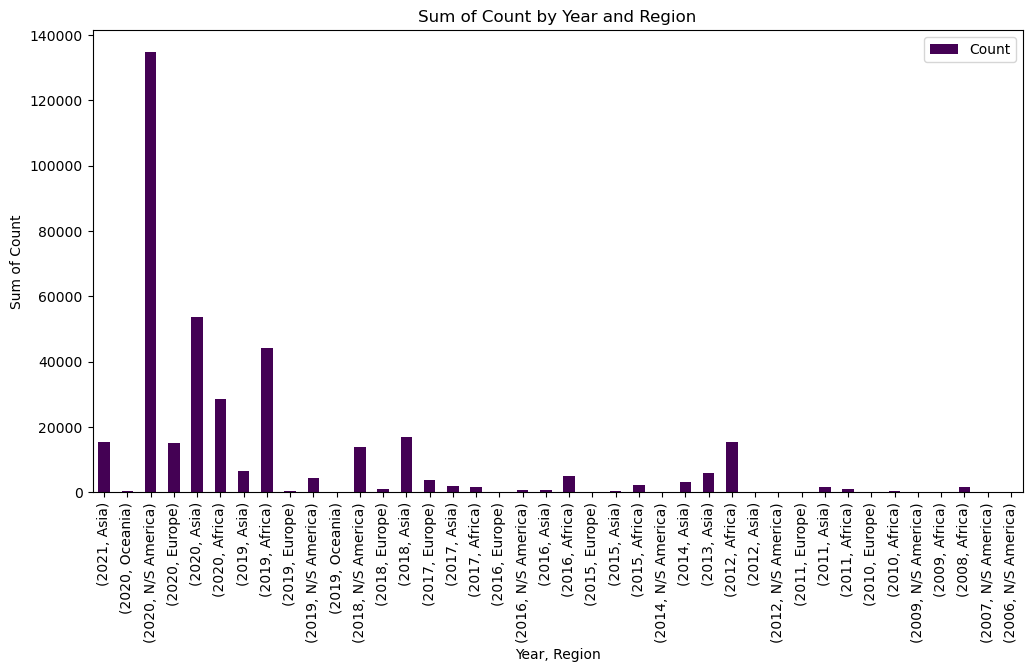

In [177]:
df6.plot(kind = 'bar', figsize = (12,6), colormap = 'viridis')
plt.xlabel('Year, Region')
plt.ylabel('Sum of Count')
plt.title('Sum of Count by Year and Region')
plt.show()

In [179]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [183]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [185]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [187]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [191]:
data = {'Category':df7.index, 
        'Value': df7.values,
        'Info': df7.values
       }
df = pd.DataFrame(data)
df

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


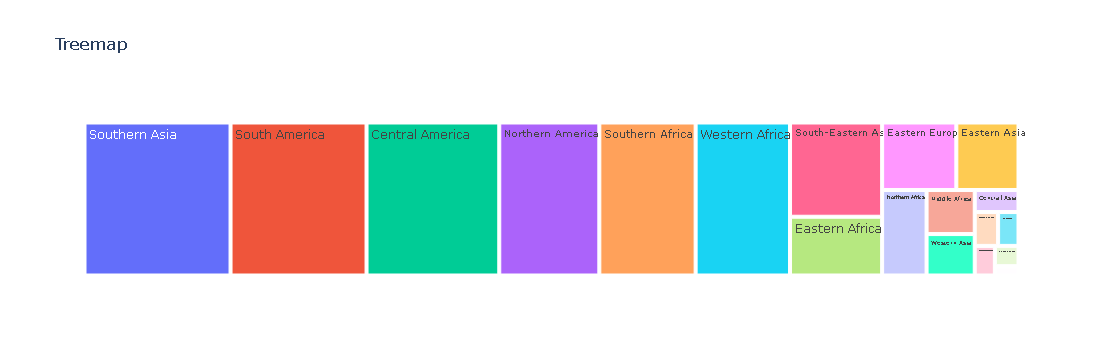

In [201]:
fig = px.treemap(df, path = ['Category'], values = 'Value', title = 'Treemap')
fig.update_traces(hovertemplate = 'Category: %(label)<br>Value:%(value)')
fig.show()